# Assignment 3
__Simon Karumbi__    
    s3455453

### Honour Code
I solemnly swear that I have not discussed my assignment solutions with anyone in any way and the solutions I am submitting are my own personal work.

_Simon Karumbi_

### Part A: Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# setting all the columns to be visible
pd.set_option('display.max_columns', None)

In [2]:
# Importing the dataset
df = pd.read_csv('A3_Q1_train.csv')

# Printing the shape of the data to make sure it imported correctly
print(df.shape)

(500, 7)


In [3]:
# Previewing the data
df.head()

,row_id,age,education_years,workclass,marital_status,occupation,annual_income
0,1,48,14,Local-gov,Divorced,Prof-specialty,high_income
1,2,23,13,Local-gov,Never-married,Prof-specialty,low_income
2,3,45,13,Local-gov,Never-married,Prof-specialty,low_income
3,4,51,13,Federal-gov,Married-civ-spouse,Exec-managerial,low_income
4,5,51,14,Local-gov,Married-civ-spouse,Prof-specialty,high_income


In [4]:
# Removing the ID column as it is a redundant feature
df = df.drop(columns = 'row_id')

In [5]:
# Assigning the target feature to a variable
target = df['annual_income']

In [6]:
# Creating a new data frame with equal binned categorical variables for the numeric variables
df_all_cat = df.copy().drop(columns = 'annual_income')
df_all_cat['age'] = pd.qcut(df['age'], 3, labels = ['low', 'medium', 'high'])
df_all_cat['education_years'] = pd.qcut(df['education_years'], 3, labels = ['low', 'medium', 'high'])

In [7]:
# Previewing the new data frame
df_all_cat.head()

,age,education_years,workclass,marital_status,occupation
0,high,high,Local-gov,Divorced,Prof-specialty
1,low,medium,Local-gov,Never-married,Prof-specialty
2,medium,medium,Local-gov,Never-married,Prof-specialty
3,high,medium,Federal-gov,Married-civ-spouse,Exec-managerial
4,high,high,Local-gov,Married-civ-spouse,Prof-specialty


In [8]:
# As requested in the Assignment brief
for col in df_all_cat.columns.tolist():  
    print(col + ':')
    print(df_all_cat[col].value_counts())
    print('********')

age:
medium    179
low       169
high      152
Name: age, dtype: int64
********
education_years:
medium    187
low       174
high      139
Name: education_years, dtype: int64
********
workclass:
Local-gov      225
State-gov      148
Federal-gov    127
Name: workclass, dtype: int64
********
marital_status:
Married-civ-spouse    230
Never-married         155
Divorced              115
Name: marital_status, dtype: int64
********
occupation:
Prof-specialty     224
Adm-clerical       159
Exec-managerial    117
Name: occupation, dtype: int64
********


In [9]:
# One hot encoding the categorical descriptive variables, and manually encoding the target variable
df_all_cat_ohe = pd.get_dummies(df_all_cat, drop_first = True)
target = np.where(target == 'high_income', 1,0 )

In [10]:
# Ensuring that high income has been encoded as the positive target
np.unique(target, return_counts = True)

(array([0, 1]), array([320, 180]))

In [11]:
# Checking the full data frame
df_all_cat_ohe

,age_medium,age_high,education_years_medium,education_years_high,workclass_Local-gov,workclass_State-gov,marital_status_Married-civ-spouse,marital_status_Never-married,occupation_Exec-managerial,occupation_Prof-specialty
0,0,1,0,1,1,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,1
2,1,0,1,0,1,0,0,1,0,1
3,0,1,1,0,0,0,1,0,1,0
4,0,1,0,1,1,0,1,0,0,1
5,0,0,0,0,1,0,0,1,0,1
6,1,0,0,1,0,0,0,0,0,1
7,0,0,1,0,1,0,0,1,0,1
8,0,1,1,0,0,0,1,0,1,0
9,0,0,0,0,0,1,0,0,0,0


## Part B: Bernoulli NB

In [12]:
# Fitting the Bernoulli NB model with default values
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(df_all_cat_ohe, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [13]:
# Making a prediction based on accuracy
bernoulli_preds = bernoulli_nb.predict(df_all_cat_ohe)
bernoulli_score = accuracy_score(target, bernoulli_preds)
print(f'The accuracy of the deafult Bernoulli model is: {bernoulli_score * 100}%')

The accuracy of the deafult Bernoulli model is: 81.8%


## Part C: Gaussian NB

In [14]:
# Fitting a Gaussian NB model with default values
gaussian_nb = GaussianNB()
gaussian_nb.fit(df_all_cat_ohe, target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
# Making a prediction based on accuracy
gaussian_preds = gaussian_nb.predict(df_all_cat_ohe)
gaussian_score = accuracy_score(target, gaussian_preds)
print(f'The accuracy of the deafult Gaussian model is: {round(gaussian_score * 100, 3)}%')

The accuracy of the deafult Gaussian model is: 81.4%


## Part D: Hyperparameter Tuning

#### Bernoulli Naive Bayes

In [16]:
# Setting a range of alpha parameters
params_bernoulli = {'alpha': np.arange(0, 101, step = 1)}

# Creating a Grid Search to tune alpha
gs_bernoulli_nb = GridSearchCV(estimator = bernoulli_nb, 
                     param_grid = params_bernoulli, 
                     verbose = 1, 
                     scoring = 'accuracy')

In [17]:
gs_bernoulli_nb.fit(df_all_cat_ohe, target)

Fitting 3 folds for each of 101 candidates, totalling 303 fits


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
[Parallel(n_

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([  0,   1, ...,  99, 100])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [18]:
df_bernoulli = pd.DataFrame(gs_bernoulli_nb.cv_results_['params'])
df_bernoulli['accuracy_score'] = gs_bernoulli_nb.cv_results_['mean_test_score']
df_bernoulli.head()

,alpha,accuracy_score
0,0,0.81
1,1,0.81
2,2,0.81
3,3,0.81
4,4,0.81


#### Plotting Bernoulli Hyperparameter Tuning

([<matplotlib.axis.XTick at 0x7f93905c77f0>,
 <a list of 11 Text xticklabel objects>)

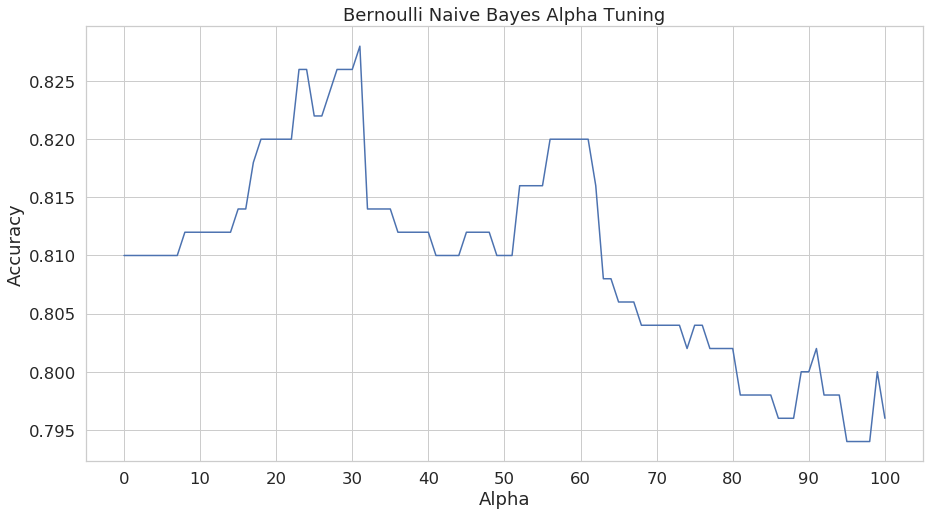

In [19]:
plt.figure(figsize = (15,8))
sns.set(style = 'whitegrid', font_scale = 1.5)
ax = sns.lineplot(x = 'alpha', y = 'accuracy_score', data = df_bernoulli, palette = 'deep')
ax.set(xlabel = 'Alpha', ylabel = 'Accuracy', title = 'Bernoulli Naive Bayes Alpha Tuning')

plt.xticks(np.arange(0,101, step  = 10))

#### Hyperparamter Tuning Results

In [20]:
tuned_bernoulli_score = gs_bernoulli_nb.best_score_ 
print(f'The ideal parameters for alpha is: {gs_bernoulli_nb.best_params_["alpha"]}')
print(f'With an accuracy of {round(tuned_bernoulli_score * 100, 3)}%')

The ideal parameters for alpha is: 31
With an accuracy of 82.8%


#### Gaussian Naive Bayes

In [21]:
params_gaussian = {'var_smoothing': np.logspace(0,-9, num=100)}

In [22]:
gs_gaussian_nb = GridSearchCV(estimator = gaussian_nb, 
                     param_grid = params_gaussian, 
                     verbose = 1, 
                     scoring = 'accuracy')

In [23]:
gs_gaussian_nb.fit(df_all_cat_ohe, target)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'var_smoothing': array([1.00000e+00, 8.11131e-01, ..., 1.23285e-09, 1.00000e-09])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [24]:
# Creating a data frame to hold the test results
df_gaussian = pd.DataFrame(gs_gaussian_nb.cv_results_['params'])
df_gaussian['accuracy_score'] = gs_gaussian_nb.cv_results_['mean_test_score']
df_gaussian.head()

,var_smoothing,accuracy_score
0,1.000000,0.800
1,0.811131,0.820
2,0.657933,0.812
3,0.533670,0.810
4,0.432876,0.810


#### Plotting Gaussian NB Hyperparamter Tuning

[Text(0, 0.5, 'Accuracy'),
 Text(0.5, 0, 'Var Smoothing'),
 Text(0.5, 1.0, 'Gaussian Naive Bayes Alpha Tuning')]

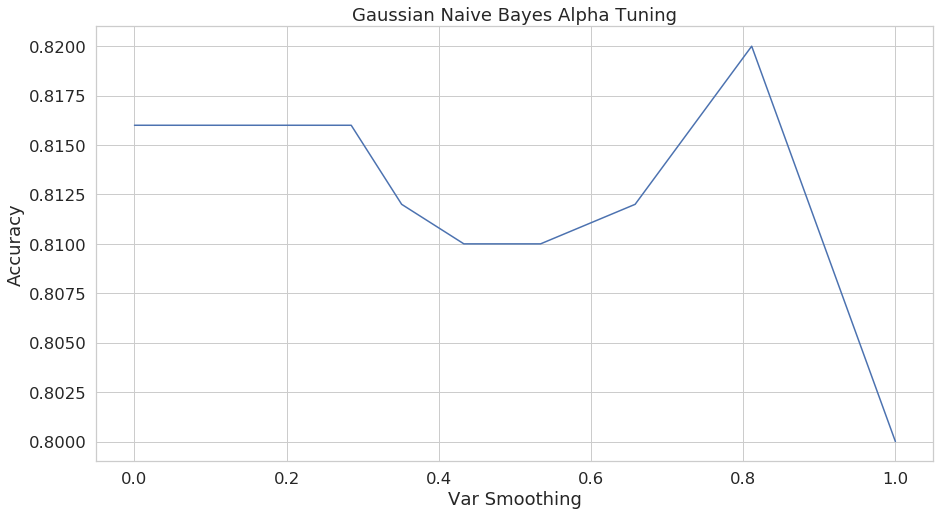

In [25]:
plt.figure(figsize = (15,8))

ax = sns.lineplot(x = 'var_smoothing', y = 'accuracy_score', data = df_gaussian, palette = 'deep')
ax.set(xlabel = 'Var Smoothing', ylabel = 'Accuracy', title = 'Gaussian Naive Bayes Alpha Tuning')

#### Hyperparamter Tuning Results

In [26]:
tuned_gaussian_score = gs_gaussian_nb.best_score_ 
print(f'The ideal parameters for variation smoothing is: {gs_gaussian_nb.best_params_["var_smoothing"]}')
print(f'With an accuracy of {round(tuned_gaussian_score * 100, 3)}%')

The ideal parameters for variation smoothing is: 0.8111308307896871
With an accuracy of 82.0%


## Part E: Hybrid Model
This can be calculated as the probability of the Gaussian Probability given the numeric descriptive features, multiplied by the probability of the Bernoulli Probablity given the categorical descriptive features.

In [27]:
# Separating the original data frame into discrete and categorical features
df_gaussian = df[['age', 'education_years']]
df_bernoulli = df[['workclass', 'marital_status', 'occupation']]

In [28]:
# One hot encoding the categorical variables
df_bernoulli = pd.get_dummies(df_bernoulli, drop_first = True)

In [29]:
# Fitting a Bernoulli NB model on the binary data frame
hybrid_bernoulli = BernoulliNB()
hybrid_bernoulli.fit(df_bernoulli, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [30]:
# Fitting a Gaussian NB bayes model on the numerical data frame
hybrid_gaussian = GaussianNB()
hybrid_gaussian.fit(df_gaussian, target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
# Calculating the probabilities of each of the rows, independently/ naively
hb = hybrid_bernoulli.predict_proba(df_bernoulli)
hg = hybrid_gaussian.predict_proba(df_gaussian)

# Combining the predictions, and selecting the highest probability
hybrid_preds = np.argmax(hb*hg, axis = 1)

In [32]:
hybrid_score = accuracy_score(target, hybrid_preds)
print(f'The accuracy of a Hybrid Naive Bayes method is: {round(hybrid_score * 100, 3)}%')

The accuracy of a Hybrid Naive Bayes method is: 83.4%


## Part F: Summary

In [33]:
# Creating a data frame to hold the sumary data
df_summary = pd.DataFrame(columns = ['method', 'accuracy'])

In [34]:
# Assinging the methods and their accuracy scores
method = ['Bernoulli NB', 'Gaussian NB', 'Tuned Bernoulli NB', 'Tuned Gaussian NB', 'Hybrid NB']
score = [bernoulli_score, gaussian_score, tuned_bernoulli_score, tuned_gaussian_score, hybrid_score]    

In [35]:
df_summary['method'] = method 
df_summary['accuracy'] = score

In [36]:
df_summary

,method,accuracy
0,Bernoulli NB,0.818
1,Gaussian NB,0.814
2,Tuned Bernoulli NB,0.828
3,Tuned Gaussian NB,0.820
4,Hybrid NB,0.834


#### Hyperparameter Tuning vs Default
There seems to be a noticeable increase in performance when using hyperparameter tuing the adjust the alpha and the variation smoothing of the two Naive Bayes models. As alpha approaches 1.0 in Bernoulli Naive Bayes, there is a significant drop in performance. This also applies to the smoothing function that is applied to the Gaussian Naive Bayes where there is a significant drop off, when approaching the default value.

#### The Hybrid Model
The Hybrid Predictive Model seemed to produce the best results, where I suspect a tuned Hybrid Predictive Model would even produce even better results. The reason I believe this is, is because the numeric data follows a Gaussian/ Normal Distribution and be better suited for the Gaussian Naive Bayes Model, where One Hot Encoding doesn't necessarily provide a Gaussian Distribution and reduces the effectiveness.